In [1]:
# @title Import Libraries
import sys
import math
import glob, os
import cv2
import numpy as np
import pandas as pd
import geopy.distance
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.measure
from skimage import exposure
from skimage import feature
import skimage.measure


2024-07-09 16:45:37.334594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 16:45:38.280955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sdjkhosh/.local/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-07-09 16:45:38.281057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sdjkhosh/.local/lib/python3.10/sit

In [2]:
%cd ~/Projects/
%cd SkyAI-Sim

prj_path = Path('SkyAI-Sim')
sys.path.insert(0, str(prj_path))
from src.utils import geo_helper, io_helper, img_helper
from src.utils.io_helper import pretty, import_module
from src.utils import consts
from src.data.googlemap import GoogleMap

args = consts.ARGS
args

/home/sdjkhosh/Projects
/home/sdjkhosh/Projects/SkyAI-Sim
Namespace(coords=[35.15342, -89.855411, 35.130815, -89.7396372, 400], fov=78.8, aspect_ratio=[4, 3], overlap=0, utm='EPSG:32616', data_dir='dataset/Memphis/', img_size=[400, 400, 3], batch_size=8, seed=1357)


usage: SkyAI Sim Project [-h] [--coords COORDS [COORDS ...]] [--fov FOV]
                         [--aspect_ratio ASPECT_RATIO [ASPECT_RATIO ...]]
                         [--overlap OVERLAP] [--utm UTM] [--data_dir DATA_DIR]
                         [--img_size IMG_SIZE [IMG_SIZE ...]]
                         [--batch_size {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127}]
                         [--seed SEED]
SkyAI Sim Project: error: argument --fov: invalid float value: '/home/sdjkhosh/.local/share/jupyter/runtime/kernel-v2-1433613nr8aTRKDa5Kk.json'


Namespace(coords=[35.15342, -89.855411, 35.130815, -89.7396372, 400], fov=78.8, aspect_ratio=[4, 3], overlap=0, utm='EPSG:32616', data_dir='dataset/Memphis/', img_size=[400, 400, 3], batch_size=8, seed=1357)

In [9]:
aerial_data = GoogleMap(
        args=args,
        map_type='roadmap',
        data_dir=args.data_dir,
        overlap=args.overlap
        )
aerial_data.config(download_raster=True)


Checking folder:
	 dataset/Memphis/roadmap_0_35.15342_-89.855411_35.130815_-89.7396372_400 Folder Exists.
---------------------------------------------------------------------------
        Info:<src.data.googlemap.GoogleMap object at 0x7f9e0813b3d0>       
---------------------------------------------------------------------------

[INFO] Data detailed values before download.
 TL = Top Left, BR = Bottom Right
                    TL         BR     Center    TL (UTM)    BR (UTM) Map Size (m) Map Size (pixel/zoom) # Raster Images 1 Image Size (m) 1 Image Size (pixel/zoom)
y/lat        35.15342  35.130815  35.142117   239889.71    250369.7     10479.99                   337              65           160.23                       334
x/lon      -89.855411 -89.739637 -89.797524  3893790.62  3890985.98      2804.64                    80              23           120.18                       237
z/agl             NaN        NaN        NaN         NaN         NaN          NaN                   

1.824242514329861


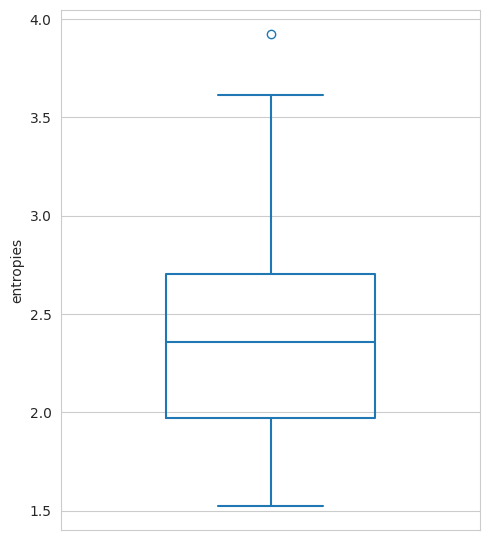

In [10]:
plt.rcParams["figure.figsize"] = [5, 5.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
aerial_data.meta_df['entropies']
sns.boxplot(aerial_data.meta_df, y='entropies', width=0.5, fill=False, dodge=False)
print(aerial_data.meta_df['entropies'].quantile(0.1))
# plt.yticks(np.arange(1, 5, 0.1))

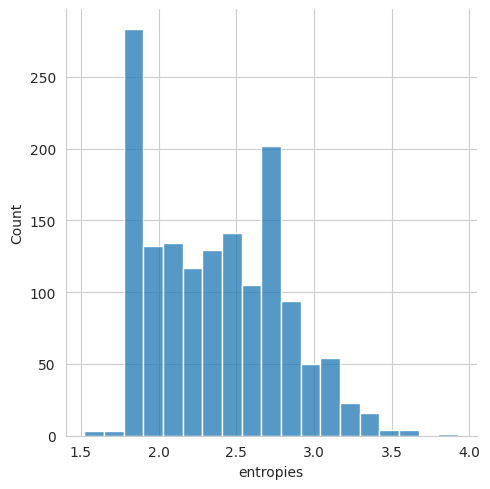

In [11]:
plt.rcParams["figure.figsize"] = [5, 5.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
aerial_data.meta_df['entropies']
sns.displot(data=aerial_data.meta_df, x='entropies')
# plt.yticks(np.arange(1, 5, 0.1))

In [16]:
nx = 5
ny = 4
seed = 4

1495
3


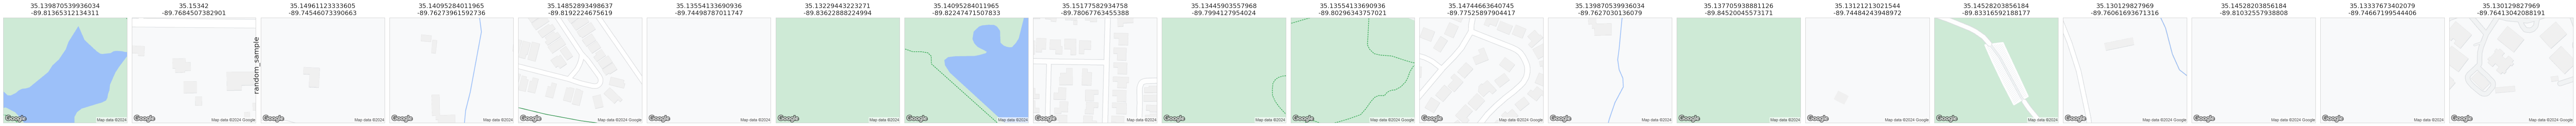

In [17]:
aerial_imgs_path = glob.glob(os.path.join(aerial_data.data_dir / 'images', "*.jpg"))
aerial_imgs_path.sort()
print(len(aerial_imgs_path))
aerial_imgs, aerial_titles = img_helper.choose_random_images(nx*ny,
                                                            aerial_imgs_path,
                                                            output_dir=aerial_data.data_dir / 'random_sample',
                                                            obj=aerial_data,
                                                            seed=seed)

3


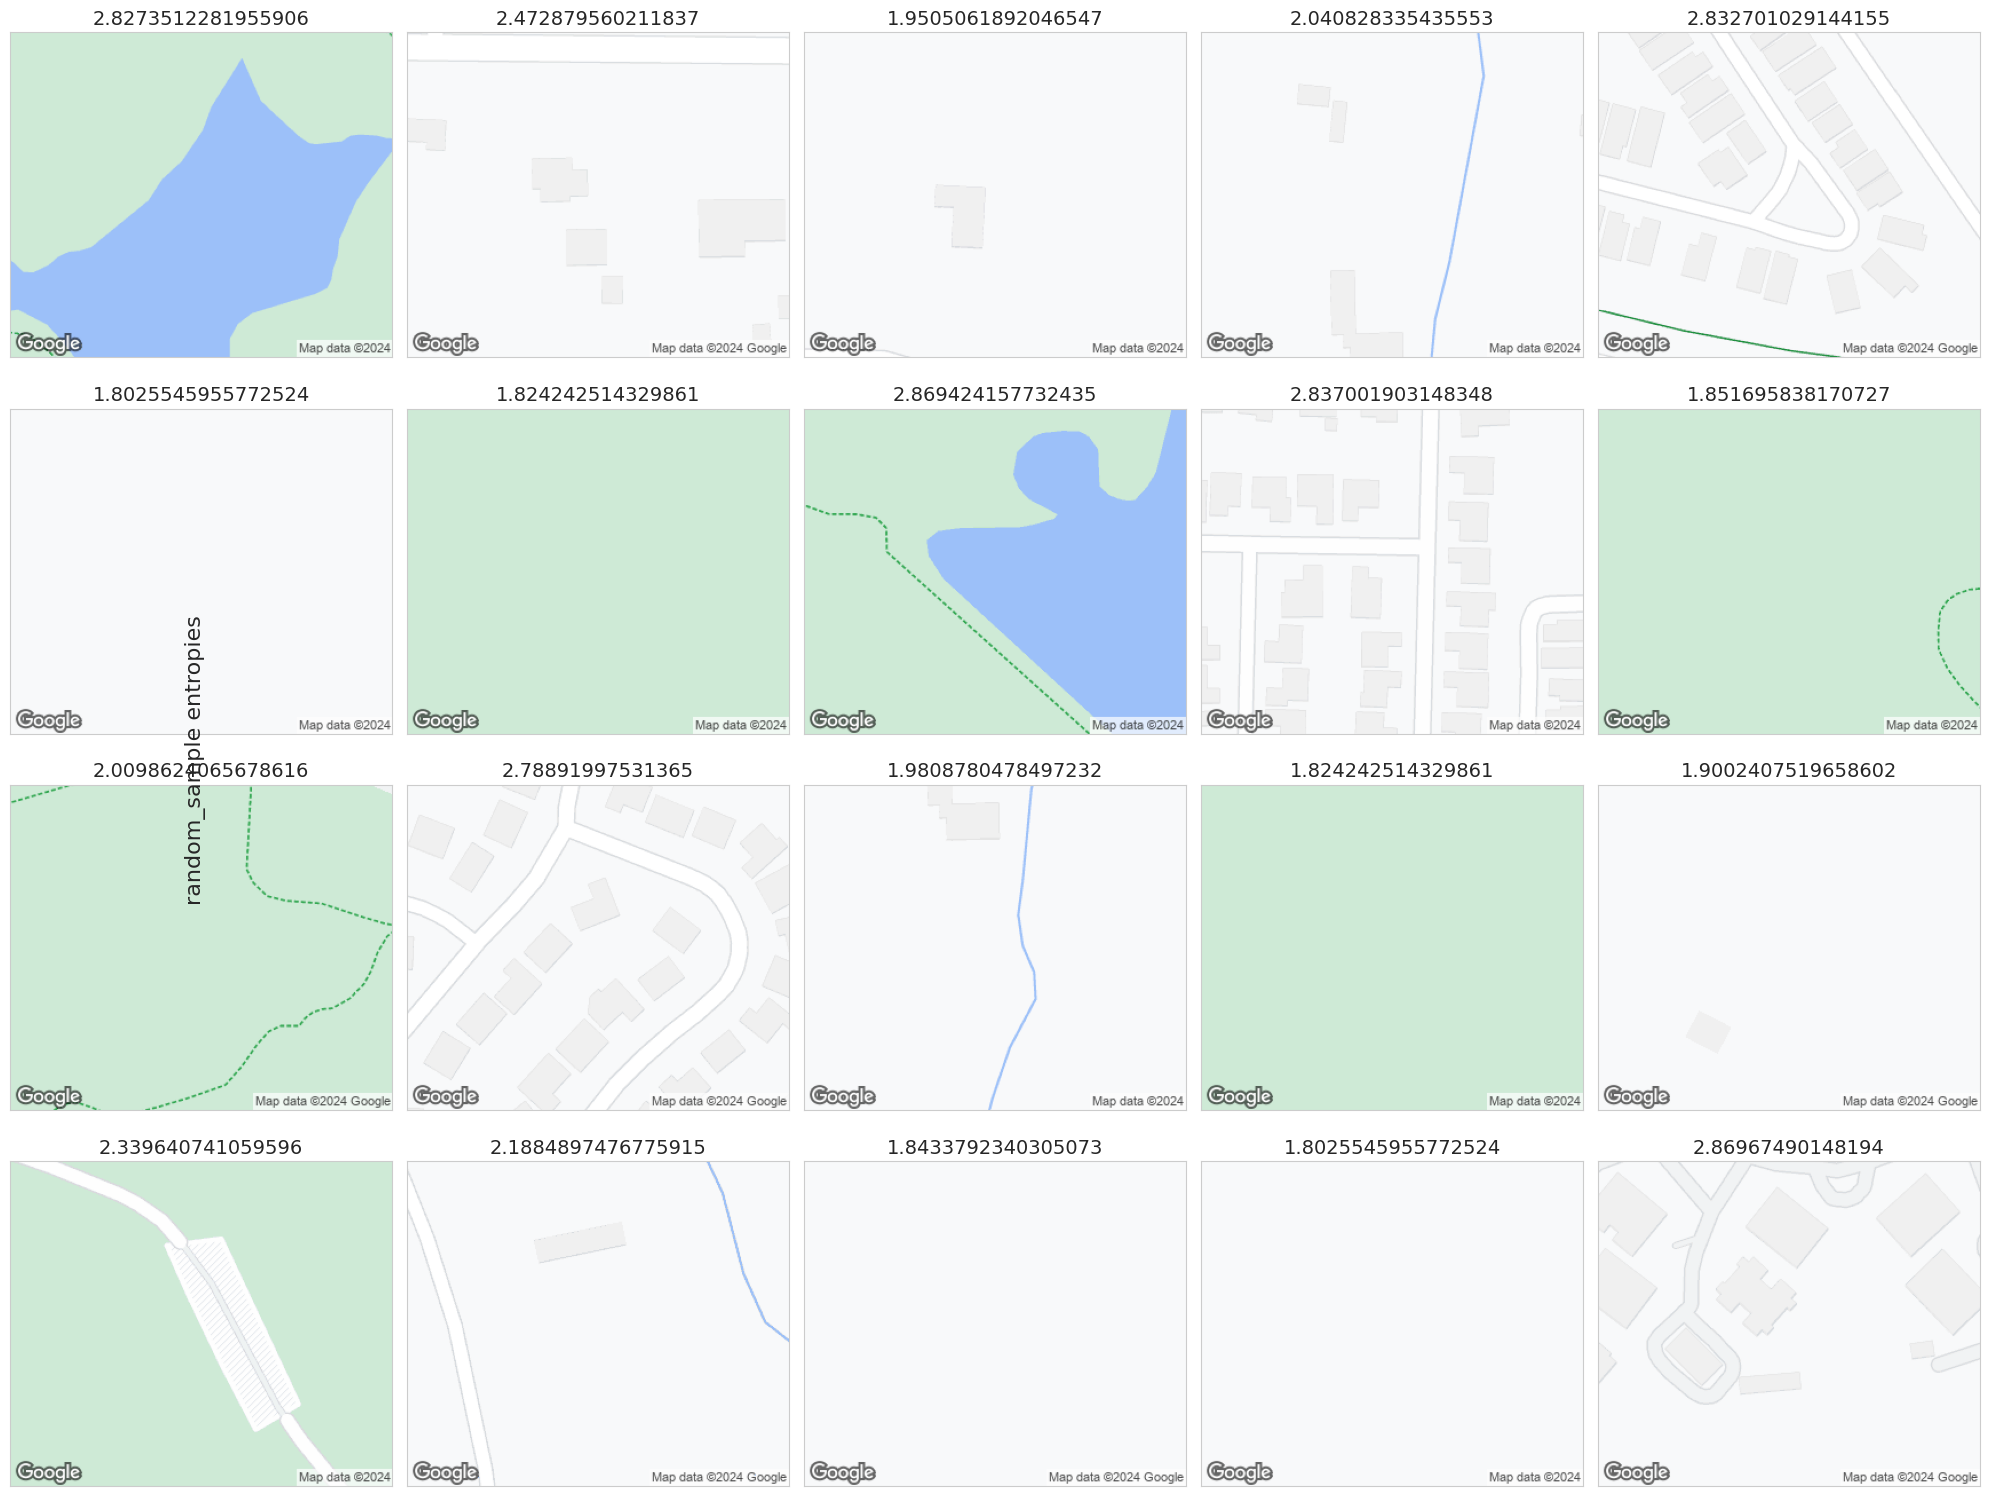

In [18]:
entropys = [skimage.measure.shannon_entropy(img) for img in aerial_imgs]

img_helper.plot_multy(
    aerial_imgs,
    aerial_data.data_dir /'random_sample entropies',
    nx, ny, entropys)